In [32]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

In [46]:
# Setup and date
adj_liste_bipartit = {
    'A': ['B', 'D'],
    'B': ['A', 'C'],
    'C': ['B', 'D'],
    'D': ['C', 'A']
}

adj_liste_not_bipartit = {
     'A': ['B', 'C'],
     'B': ['A', 'C'],
     'C': ['A', 'B']
 }

In [54]:
current_list = adj_liste_bipartit
#current_list = adj_liste_not_bipartit

In [62]:
#G= nx.from_dict_of_lists(current_list)
G = nx.bipartite.random_graph(25, 25, 0.1, seed=42)
pos = nx.spring_layout(G, seed=42, k=0.3)  

In [68]:
node_opt = {
    "node_size": 300,   
    "font_size": 8,     
    "font_color": "black",
    "edge_color": "lightgray",
    "width": 1
}

Original graph


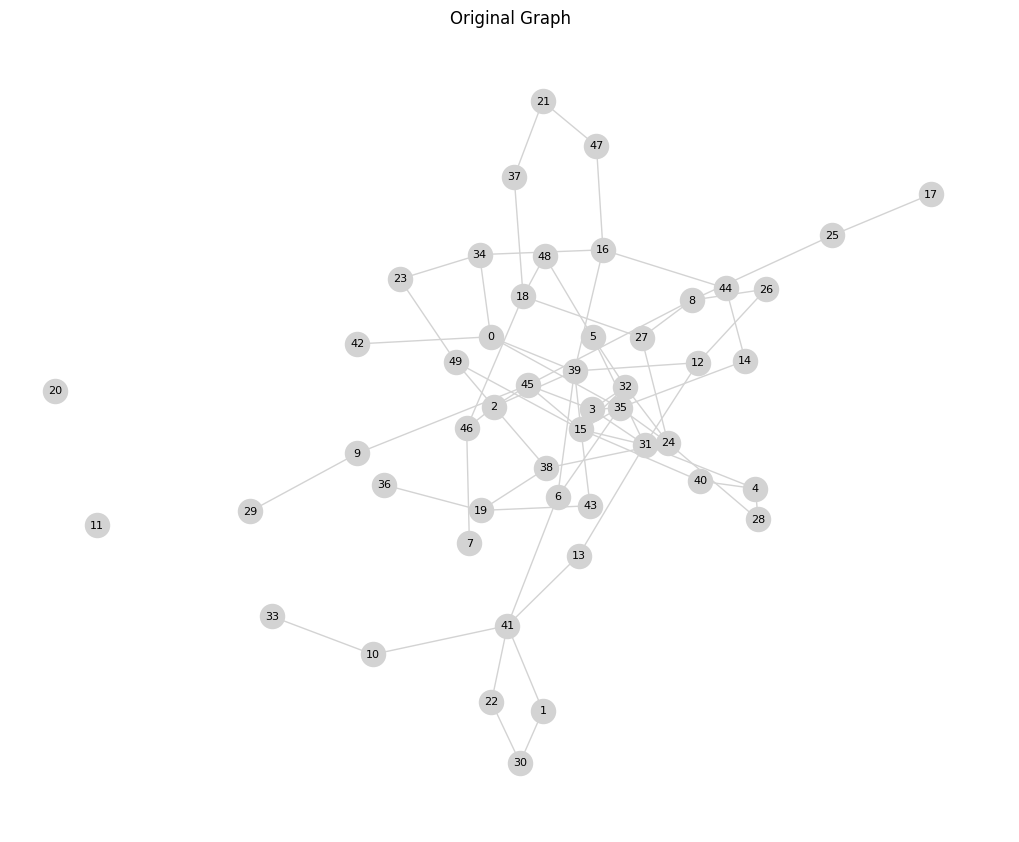

In [69]:
print("Original graph")
plt.figure(figsize=(10, 8)) 
nx.draw(G, pos, 
        node_color='lightgray', 
        with_labels=True, 
        **node_opt)
plt.title("Original Graph")
plt.show()

In [70]:
print("Finde bipartiteness with BFS")

Finde bipartiteness with BFS


In [71]:
def bfs_2_coloring(graph):
    color_map = {}  
    
    for start_node in graph.nodes():
        if start_node in color_map: continue
            
        color_map[start_node] = 0 
        queue = deque([start_node])
        
        while queue:
            u = queue.popleft()
            current_color = color_map[u]
            neighbor_color = 1 - current_color 
            
            for v in graph.neighbors(u):
                if v not in color_map:
                    color_map[v] = neighbor_color
                    queue.append(v)
                elif color_map[v] == current_color:
                    
                    return False, {} 
                    
    return True, color_map

In [72]:
is_bipartite, coloring_result = bfs_2_coloring(G)

Success! The graph can be colored with two colors.


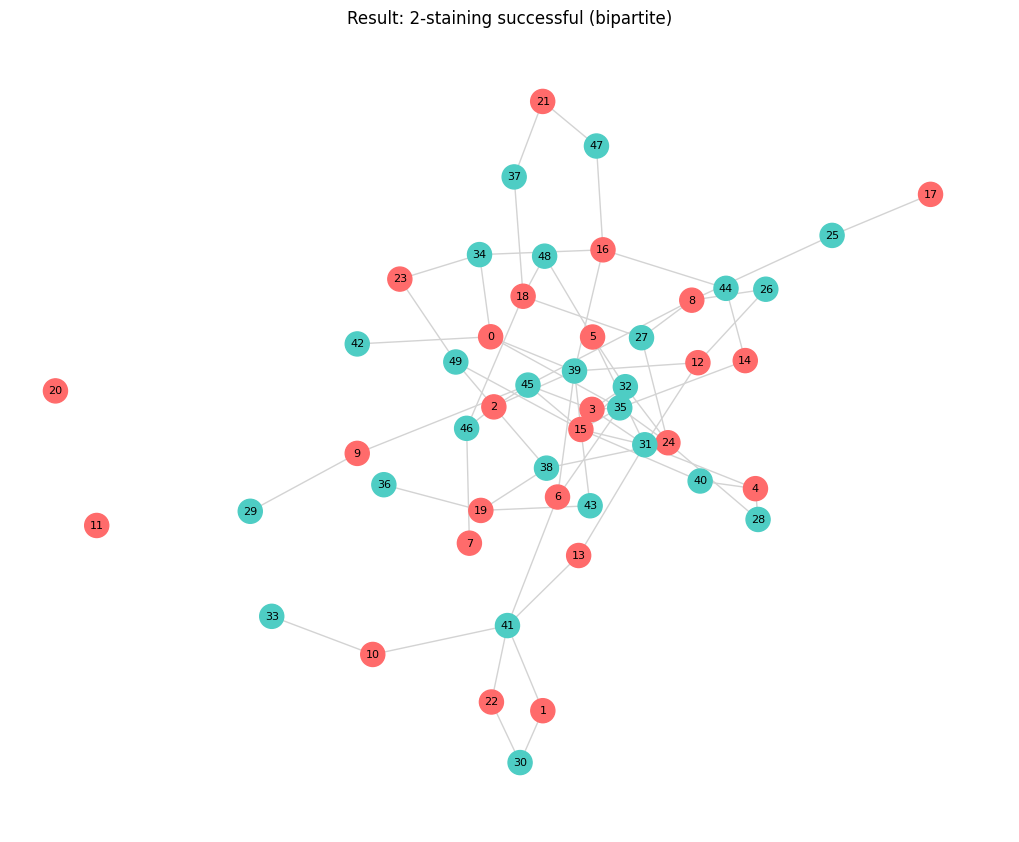

In [73]:
if is_bipartite:
    print("Success! The graph can be colored with two colors.")
    
    
    final_colors = []
    
    for node in G.nodes():
        if coloring_result[node] == 0:
            final_colors.append('#ff6b6b') 
        else:
            final_colors.append('#4ecdc4') 

    
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, 
            node_color=final_colors, 
            with_labels=True, 
            **node_opt)
    plt.title("Result: 2-staining successful (bipartite)")
    plt.show()

else:
    
    print("\n" + "="*50)
    print(">>>  RESULT: THE GRAPH CANNOT BE 2-COLORED!  <<<")
    print("A conflict was found.")
    print("="*50 + "\n")